In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
np.set_printoptions(threshold=np.nan)
from sklearn import preprocessing

In [7]:
data = pd.read_csv("../Data/preprocessed_incl_steplength.csv") 

data = data.drop(['Unnamed: 0.1'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data['Conditie'] = data['Conditie'].map({'norm': 0,  'bril': 1})
data

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Height,Weight,Age,BMI,std_SegmentData,Som_afstand,AverageStepLength
0,006A01',0,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,177,70.0,20,22.343516,0.060870,3.409617,0.610128
1,006A01',0,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,177,70.0,20,22.343516,0.038465,1.934760,0.681944
2,006A01',0,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,177,70.0,20,22.343516,0.030903,1.357366,0.713798
3,006A01',0,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,177,70.0,20,22.343516,0.074751,4.261516,0.651639
4,009A01',0,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,195,86.0,23,22.616700,0.028861,1.569590,0.768314
5,009A01',0,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,195,86.0,23,22.616700,0.029494,1.660196,0.685495
6,009A01',0,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,195,86.0,23,22.616700,0.017266,1.055629,0.689099
7,009A01',0,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,195,86.0,23,22.616700,0.015360,0.931125,0.660362
8,010A01',0,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,165,65.0,28,23.875115,0.068683,4.492418,0.538055
9,010A01',0,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,165,65.0,28,23.875115,0.024063,1.929386,0.571604


In [3]:
sidlist = data['SubjectID'].unique()

#Make an array out of all rows for every unique SubjectID and list them together
grouped_data = [data[data['SubjectID']==sid] for sid in sidlist]
# grouped_data[0]

In [4]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    np.random.shuffle(data)
    N = len(data)
    training = data[:int(ratio*N)]
    validation = data[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data):
    return pd.DataFrame(np.vstack(data), columns=['TestID', 'Conditie', 'SubjectID','SegmentNr','WalkingDirection',        
 'SegmentData', 'Height', 'Weight', 'Age', 'BMI', 'std_SegmentData', 'Som_afstand', 'AverageStepLength'])

training,validation = validation_split(grouped_data, 0.7)
training = flatten(training)
validation = flatten(validation)
# print(len(training))



In [5]:
training_matrix = training.as_matrix()
X_train = np.array(training_matrix[:,[11, 12, 6]], dtype=float)
y_train = np.array(training_matrix[:, 1], dtype=int)

validation_matrix = validation.as_matrix()
X_test = np.array(validation_matrix[:,[11, 12, 6]], dtype=float)
y_test = np.array(validation_matrix[:, 1], dtype=int)

Accuracy of our model is equal 70.54 %.


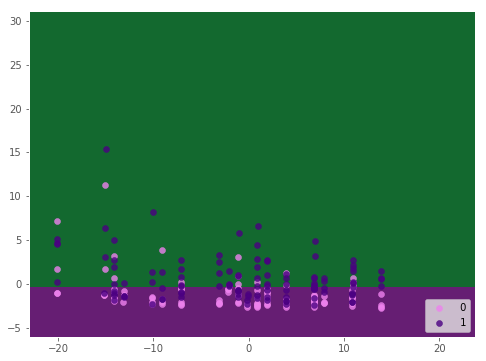

In [6]:
#3 features

import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot') 
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

plt.legend(loc='lower right')
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
plt.show()